In [1]:
import numpy as np
import scipy as sp
import sklearn
import pydotplus

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sn
sn.set_context("poster")
sn.set(rc={'figure.figsize': (20, 12.)})
sn.set_style("whitegrid")

import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

__Column Definitions__

1. id: ID number
2. diagnosis: The diagnosis of breast tissues (M = malignant, B = benign)
3. adius_mean: mean of distances from center to points on the perimeter
4. texture_mean: standard deviation of gray-scale values
5. perimeter_mean: mean size of the core tumor
6. area_mean
7. smoothness_mean: mean of local variation in radius lengths
8. compactness_mean: mean of perimeter^2 / area - 1.0
9. concavity_mean: mean of severity of concave portions of the contour
10. concave points_mean: mean for number of concave portions of the contour
11. symmetry_mean
12. fractal_dimension_mean: mean for "coastline approximation" - 1
13. radius_se: standard error for the mean of distances from center to points on the perimeter
14. texture_se: standard error for standard deviation of gray-scale values
15. perimeter_se
16. area_se
17. smoothness_se: standard error for local variation in radius lengths
18. compactness_se: standard error for perimeter^2 / area - 1.0
19. concavity_se: standard error for severity of concave portions of the contour
20. concave points_se: standard error for number of concave portions of the contour
21. symmetry_se
22. fractal_dimension_se: standard error for "coastline approximation" - 1
23. radius_worst: "worst" or largest mean value for mean of distances from center to points on the perimeter
24. texture_worst: "worst" or largest mean value for standard deviation of gray-scale values
25. perimeter_worst
26. area_worst
27. smoothness_worst: "worst" or largest mean value for local variation in radius lengths
28. compactness_worst: "worst" or largest mean value for perimeter^2 / area - 1.0
29. concavity_worst: "worst" or largest mean value for severity of concave portions of the contour
30. concave points_worst: "worst" or largest mean value for number of concave portions of the contour
31. symmetry_worst:
32. fractal_dimension_worst: "worst" or largest mean value for "coastline approximation" - 1

In [2]:
data_set = pd.read_csv('../Data-Sets/breast_cancer.csv')

In [3]:
data_set.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data_set.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


/Users/seckindinc/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


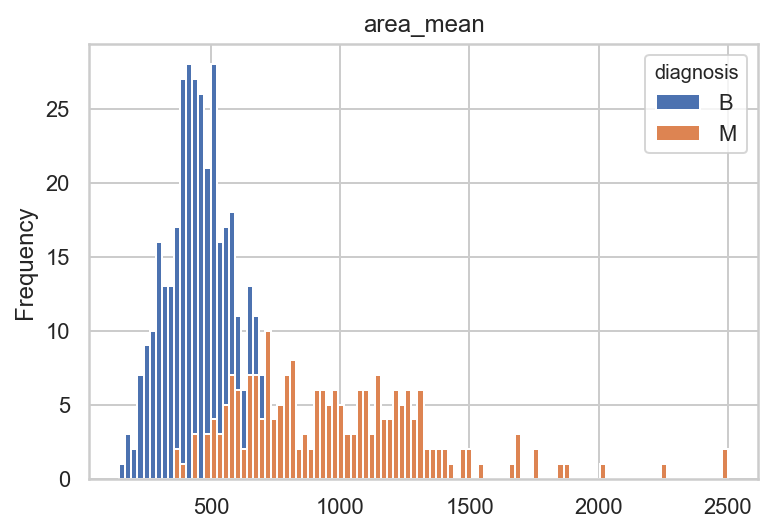

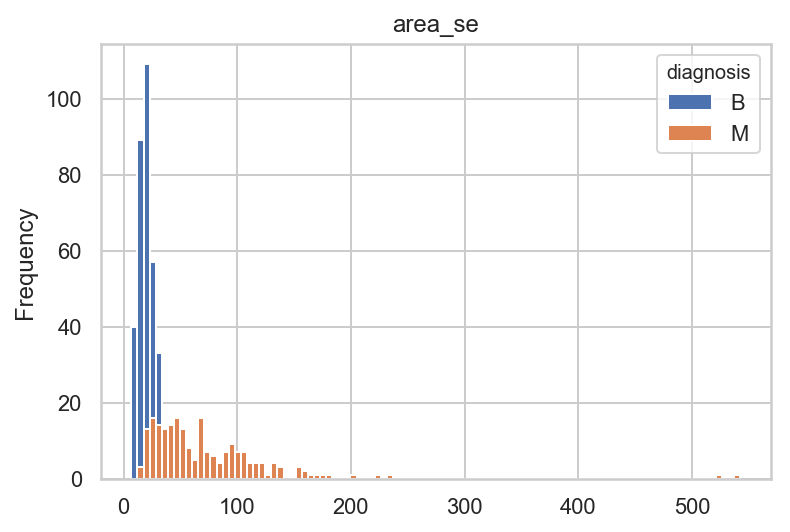

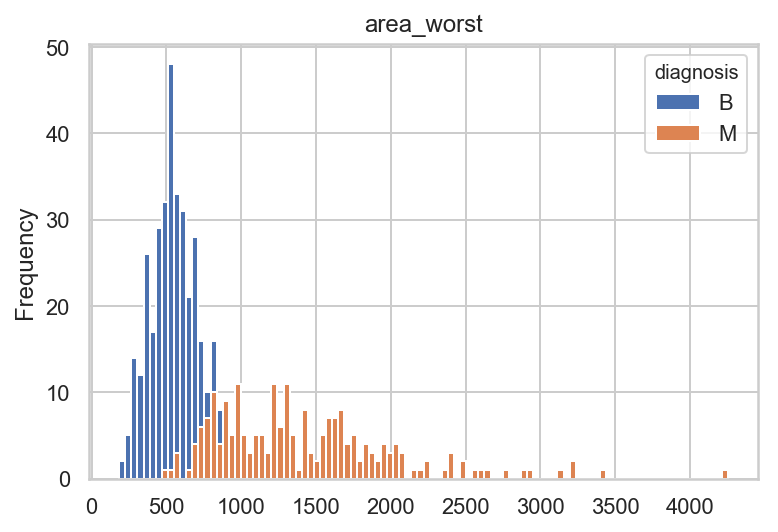

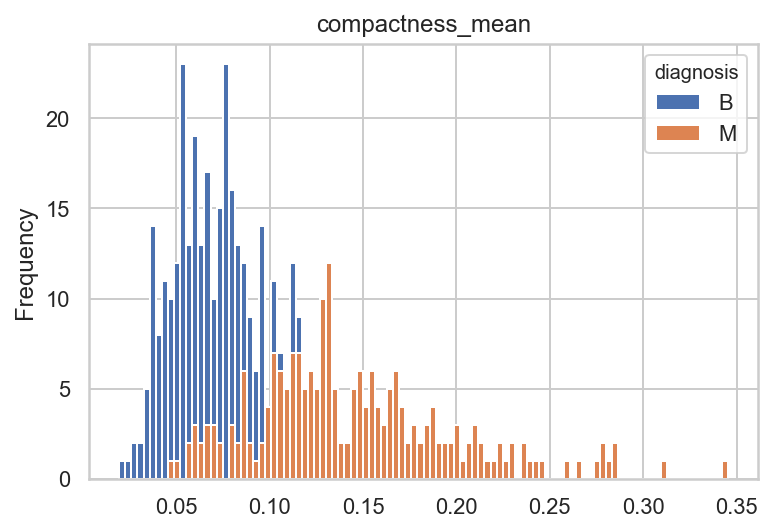

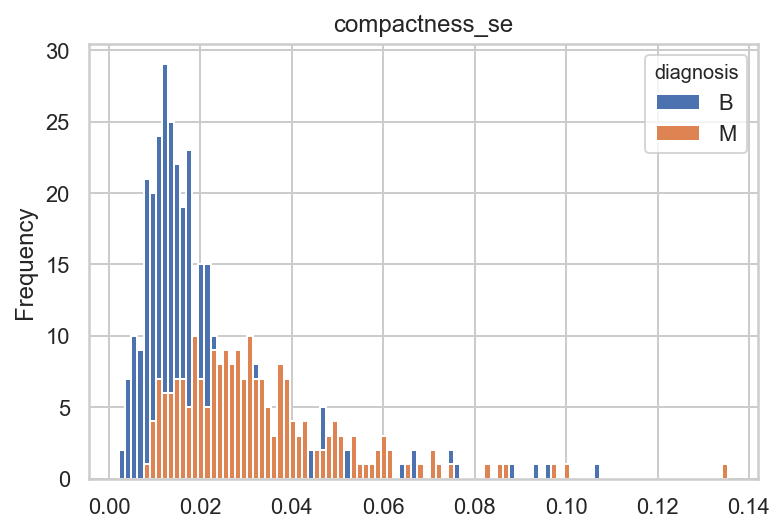

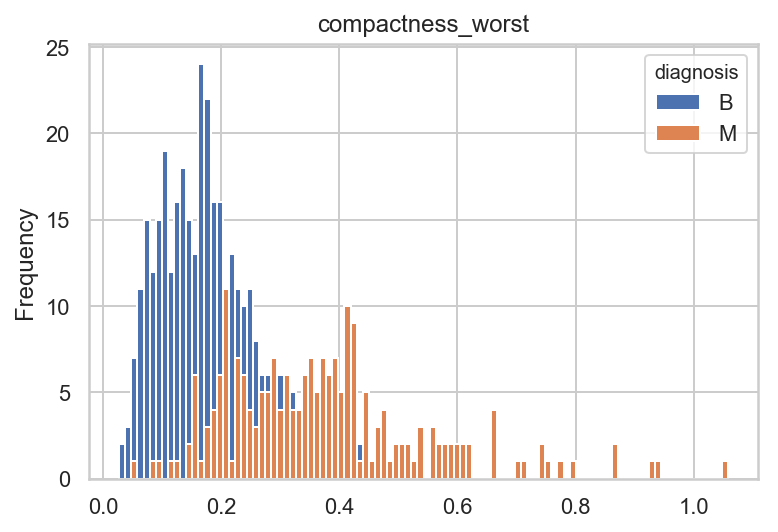

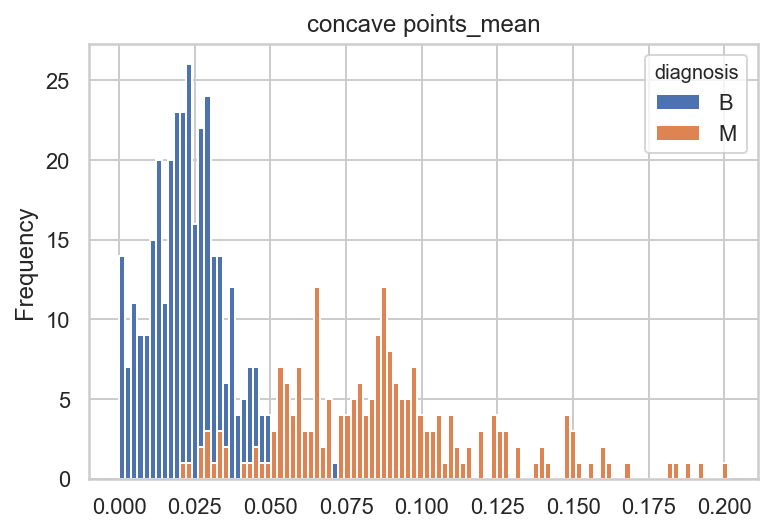

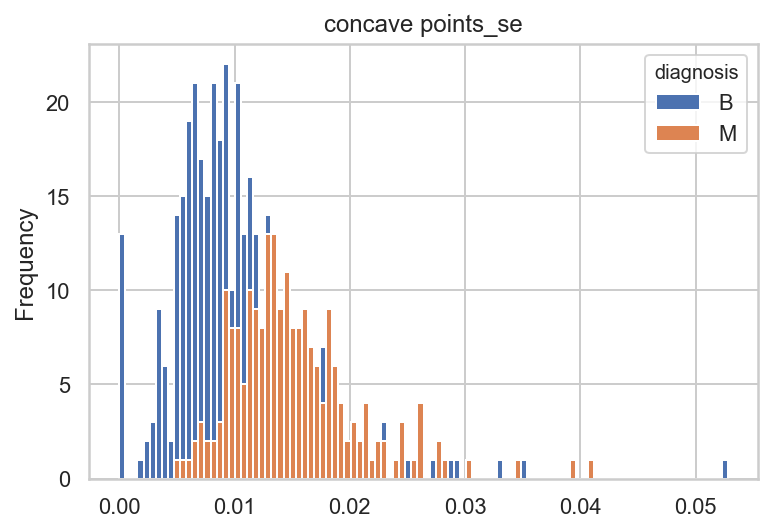

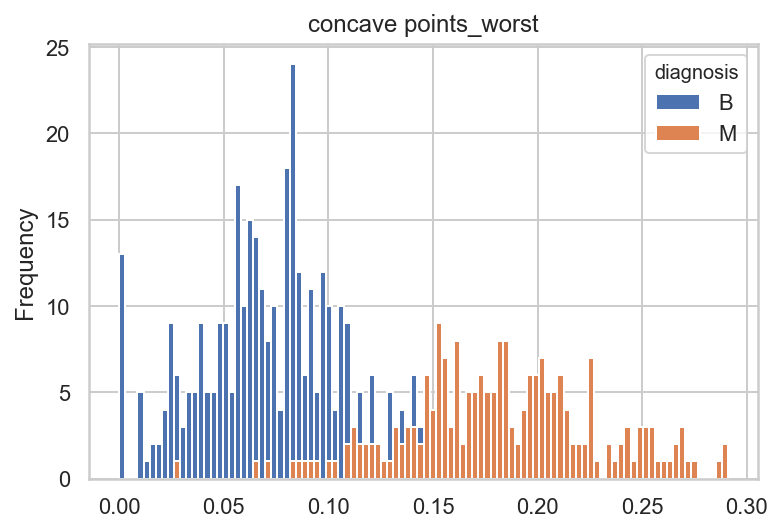

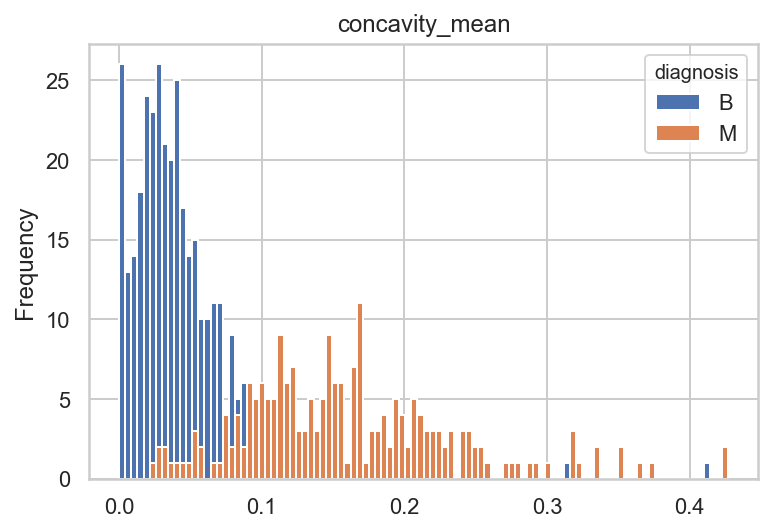

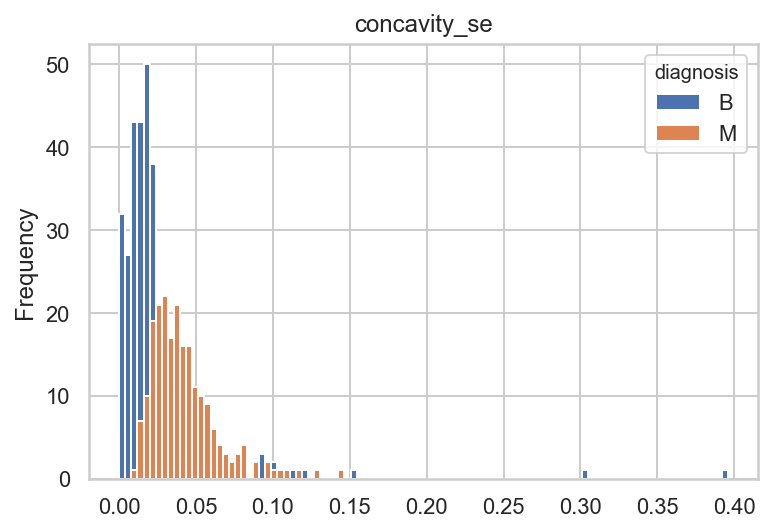

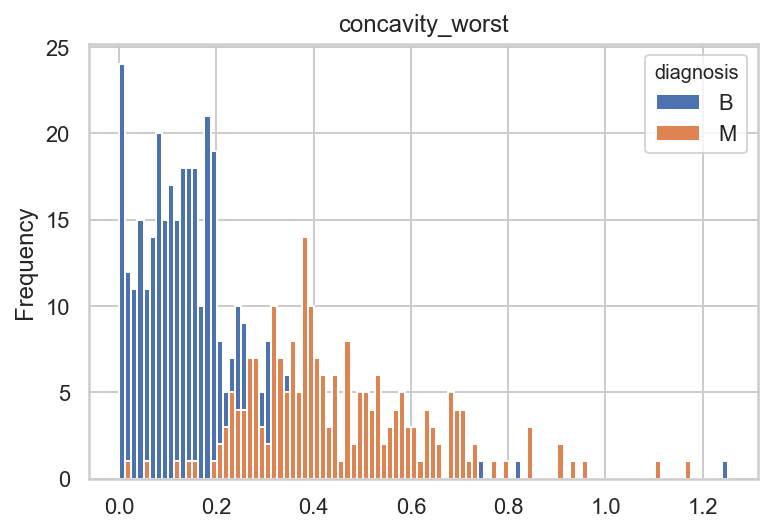

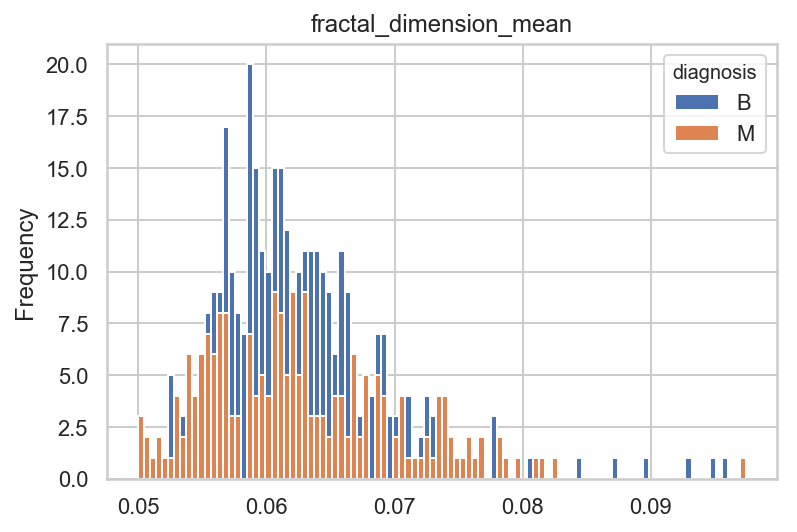

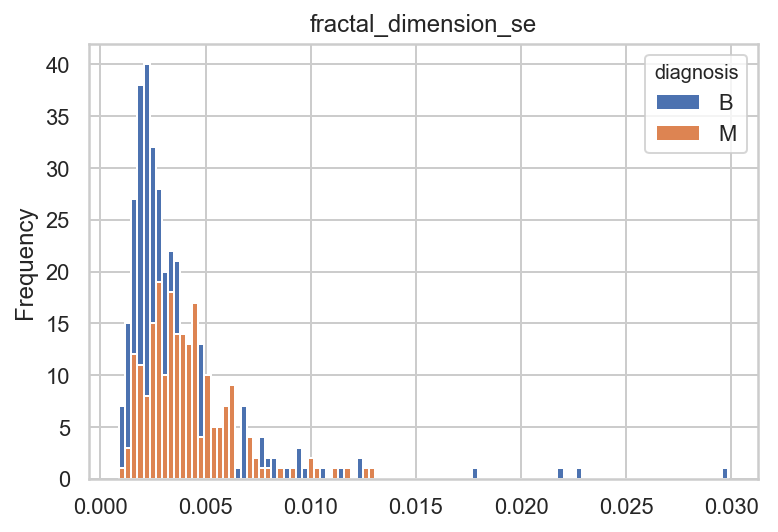

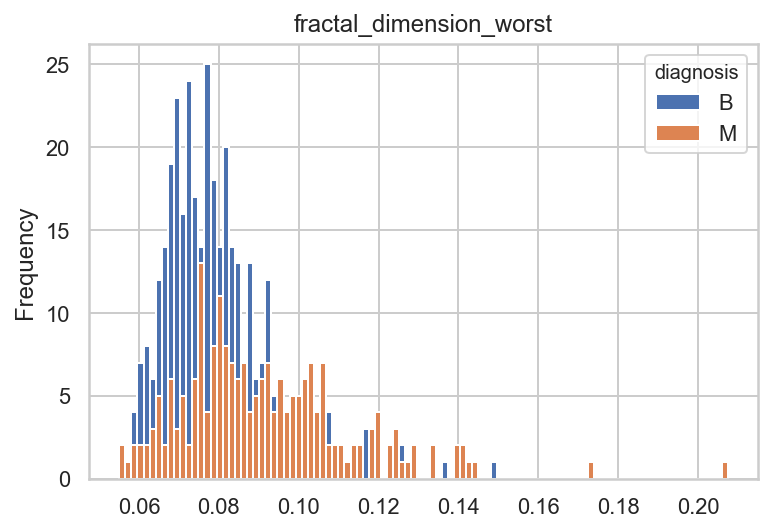

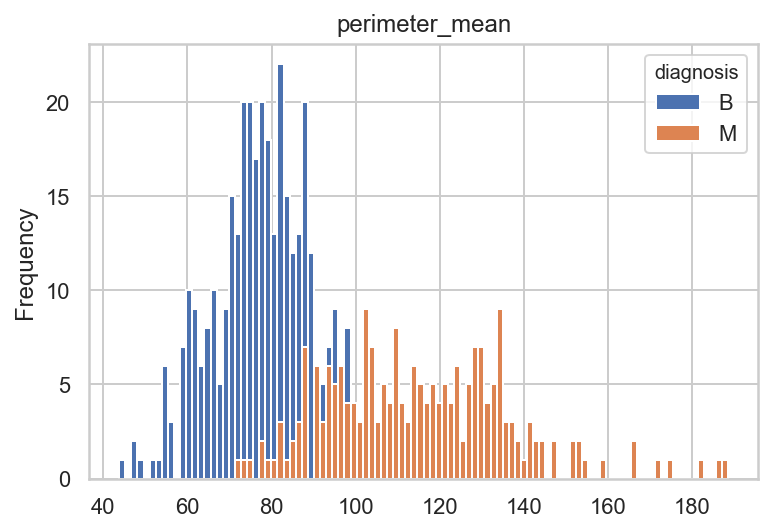

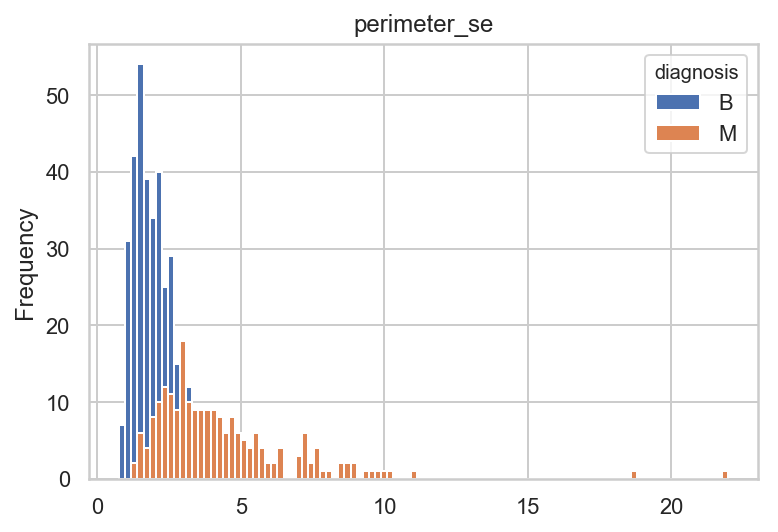

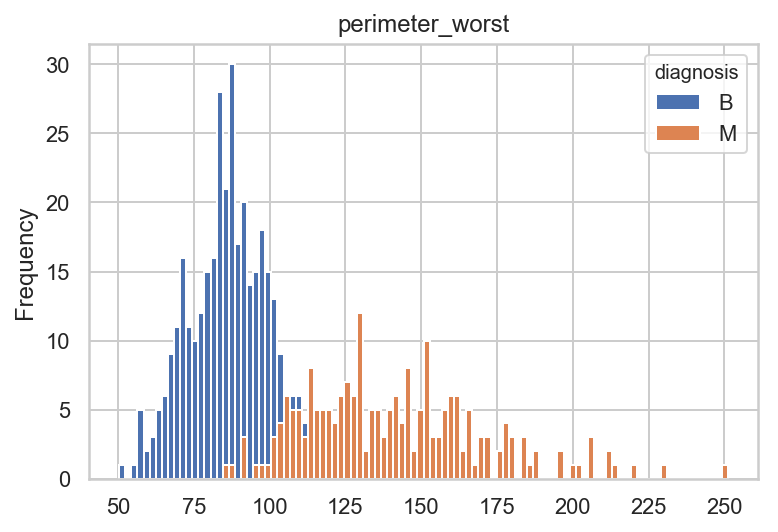

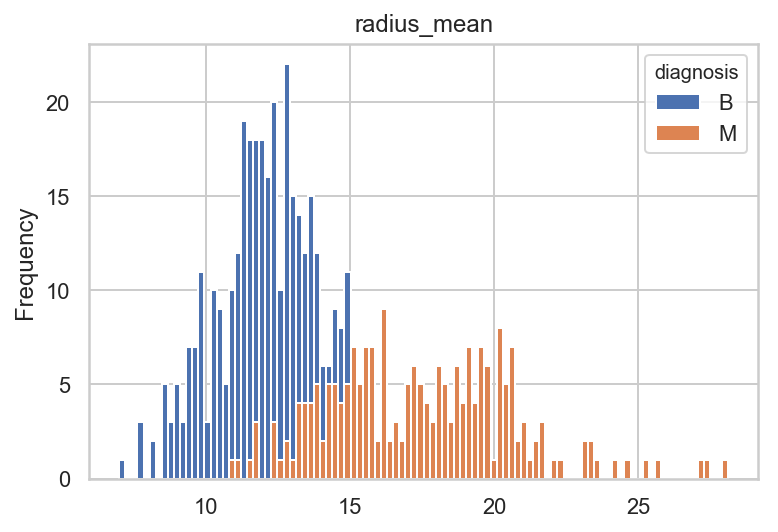

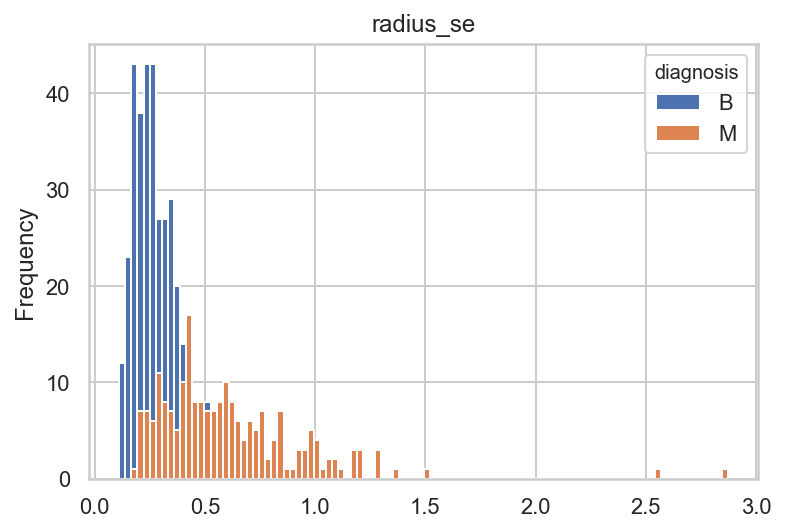

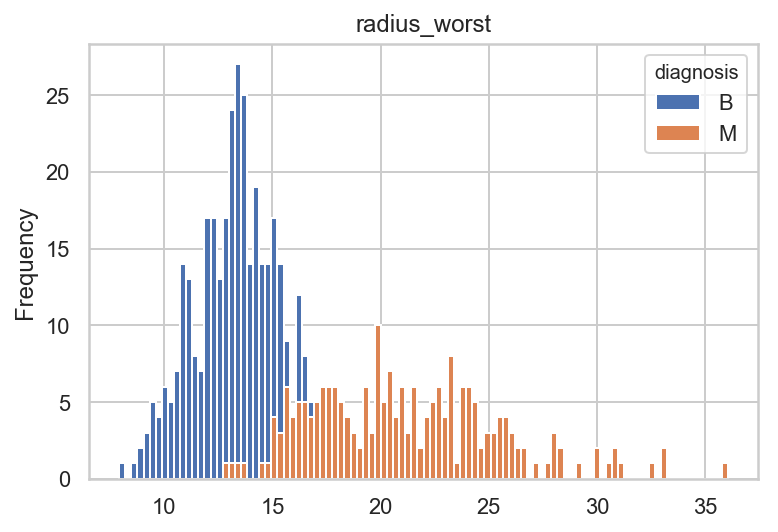

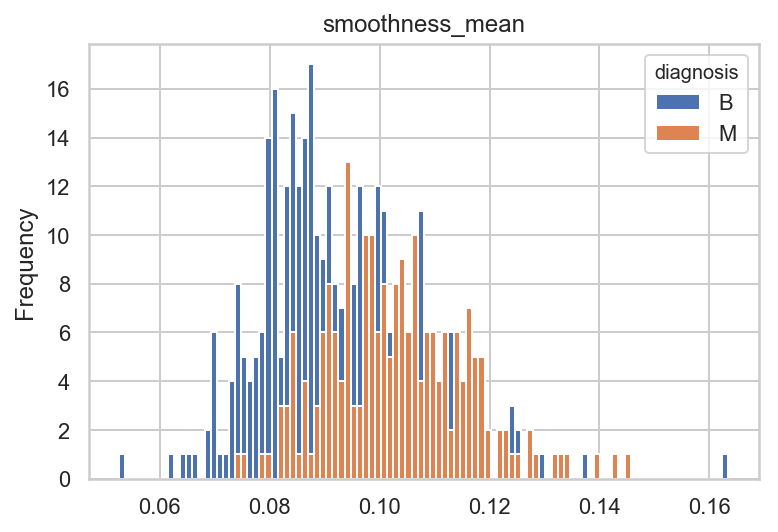

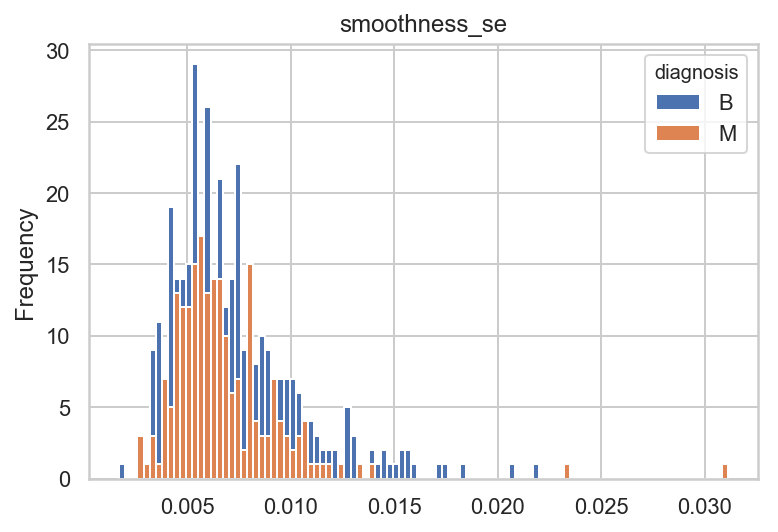

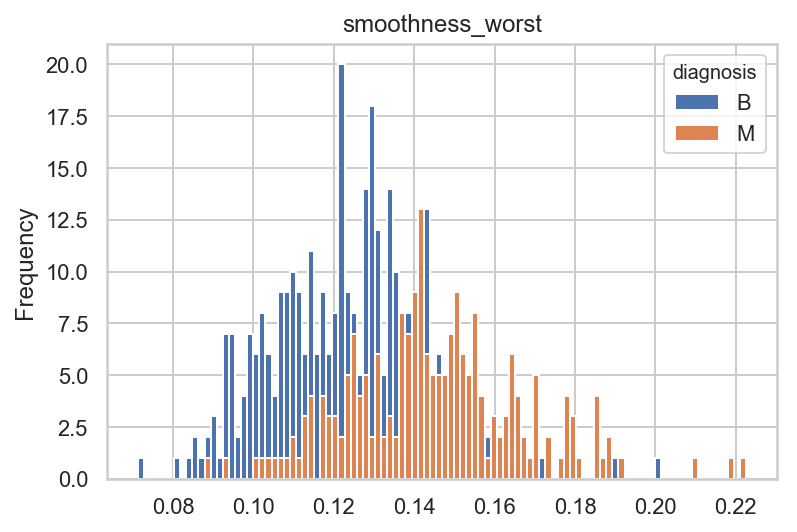

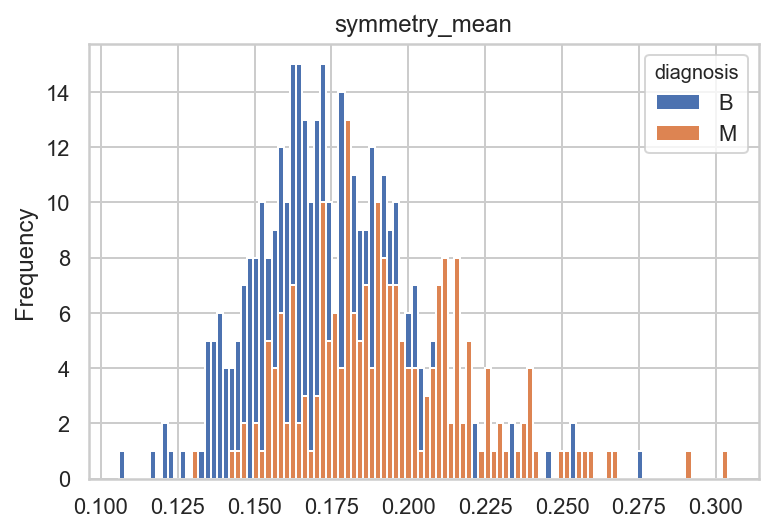

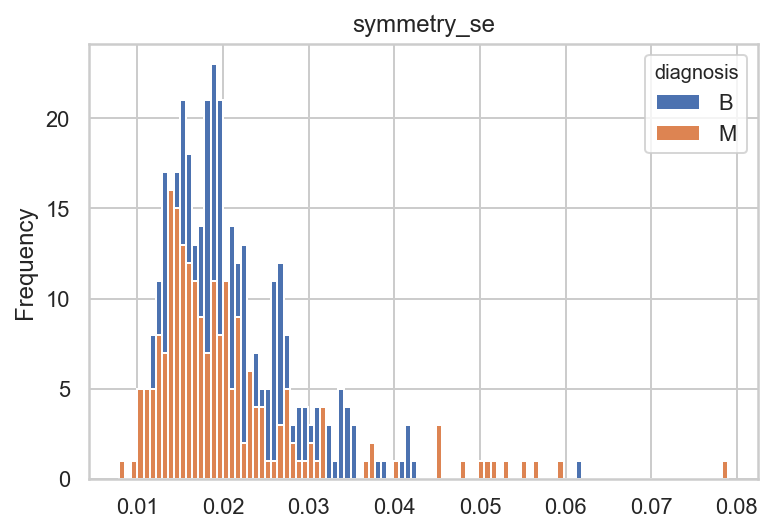

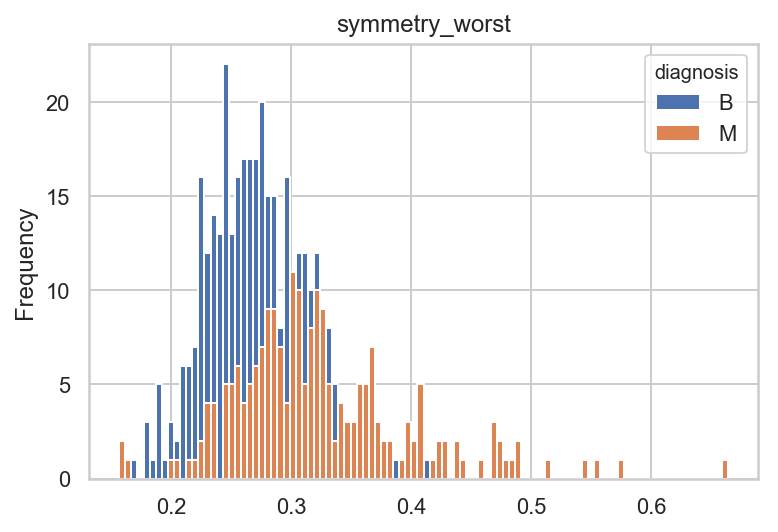

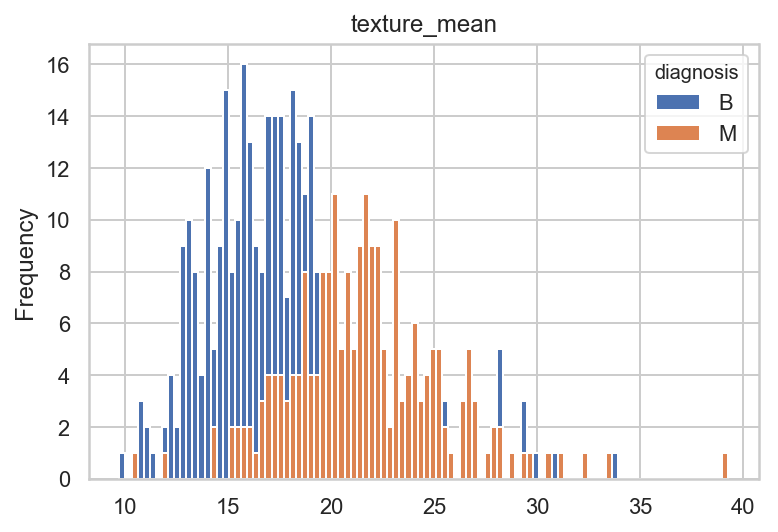

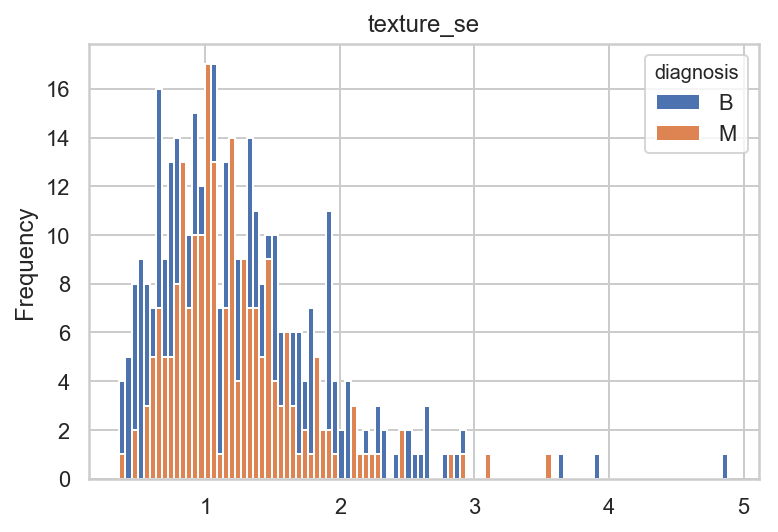

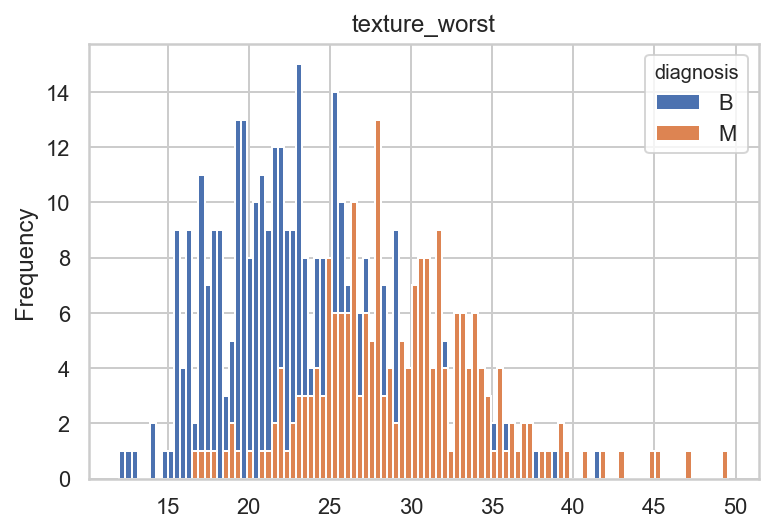

In [5]:
for i in data_set[data_set.columns.difference(['id','diagnosis','Unnamed: 32'])].columns:
    data_set.pivot(columns="diagnosis", values=i).plot.hist(bins=100)
    plt.title(i)

In [6]:
y = data_set['diagnosis']
del data_set['diagnosis']
del data_set['Unnamed: 32']
del data_set['id']

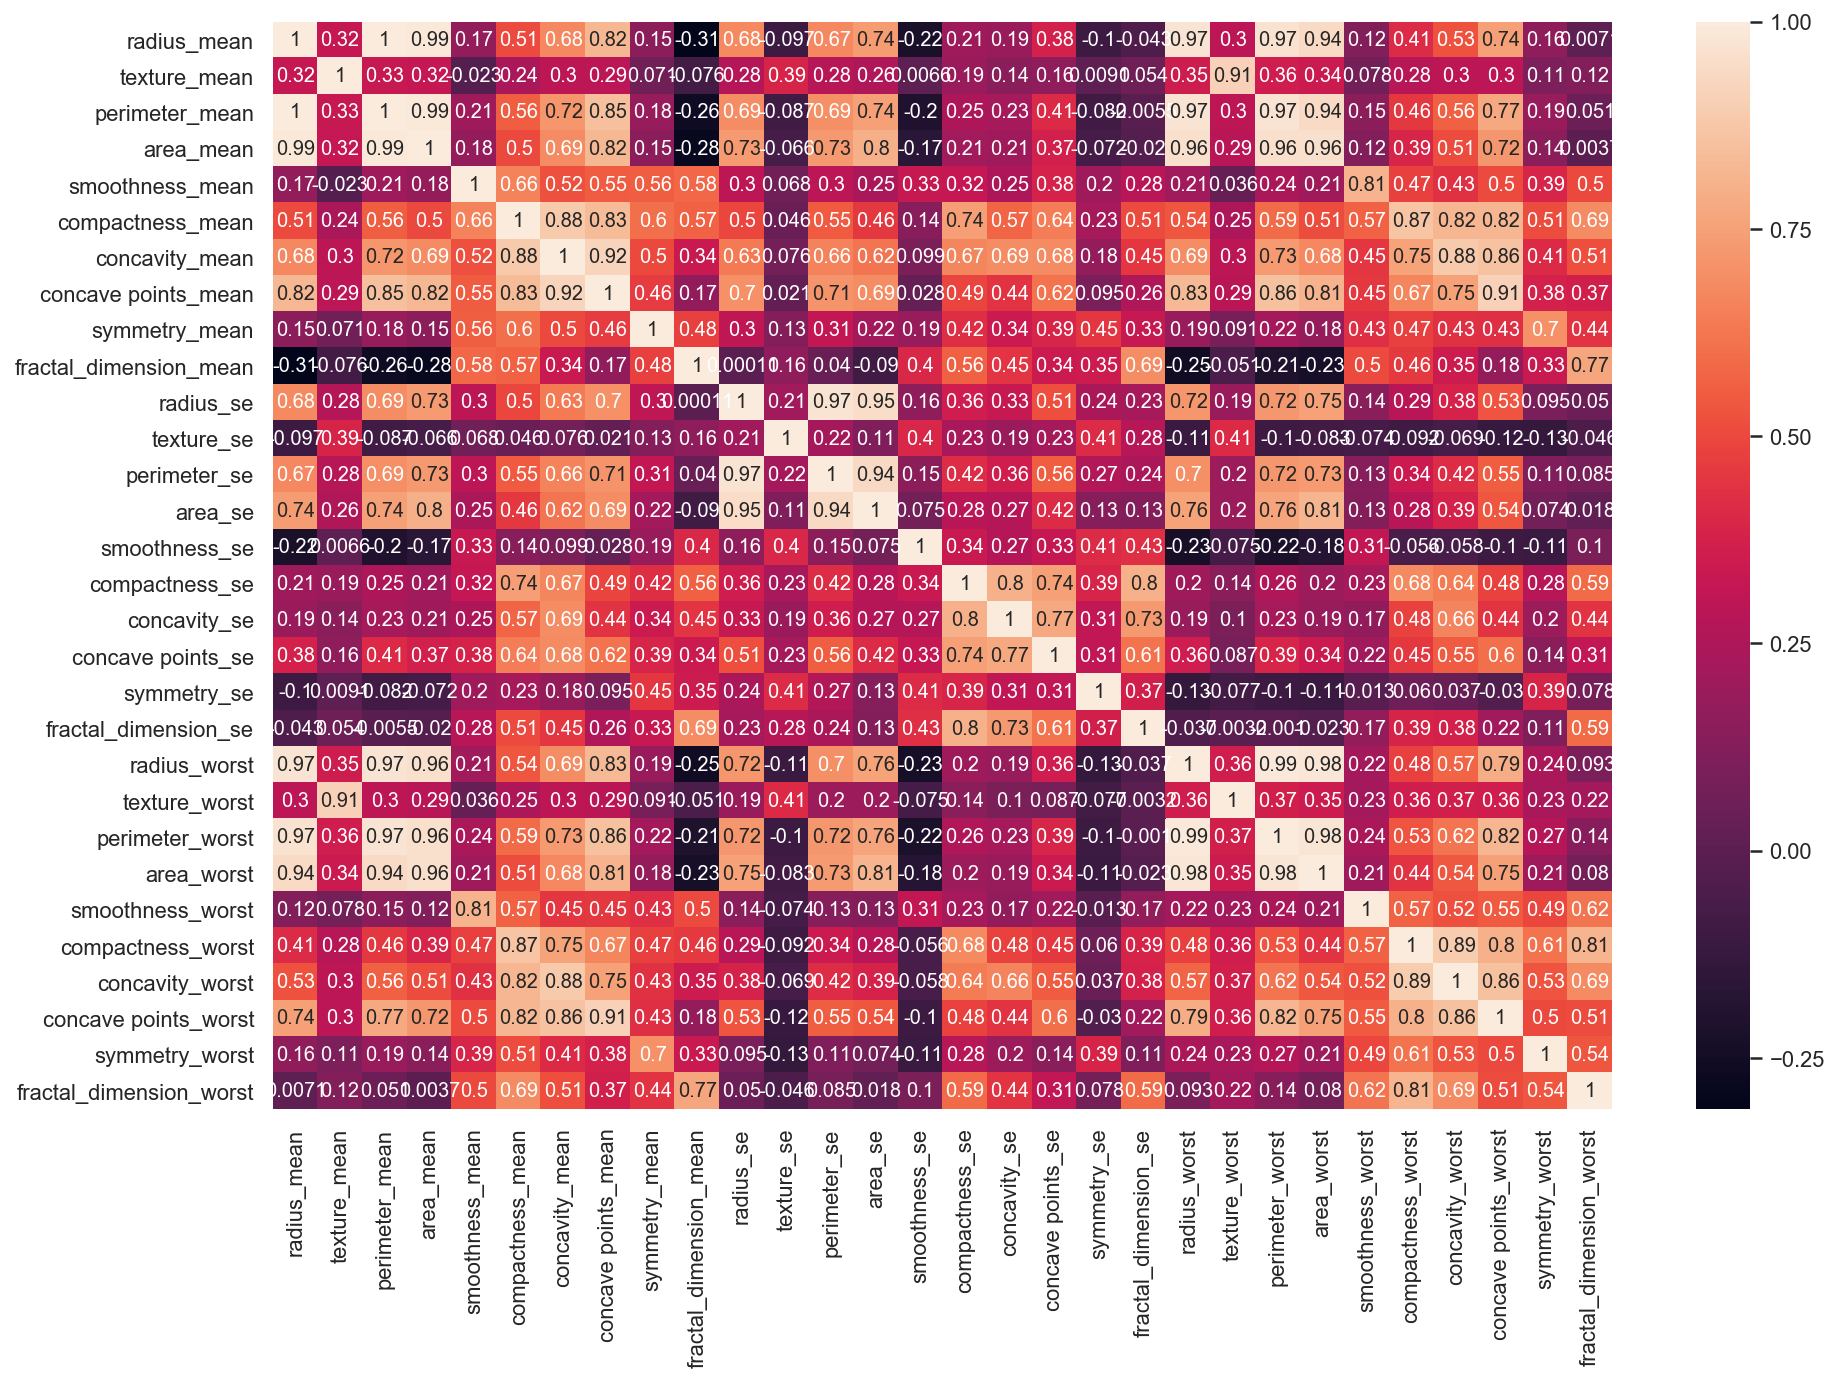

In [7]:
plt.figure(figsize=(15,10)) 
sn.heatmap(data_set.corr(),annot=True) 

Diagnosis Category Counts
 B    357
M    212
Name: diagnosis, dtype: int64


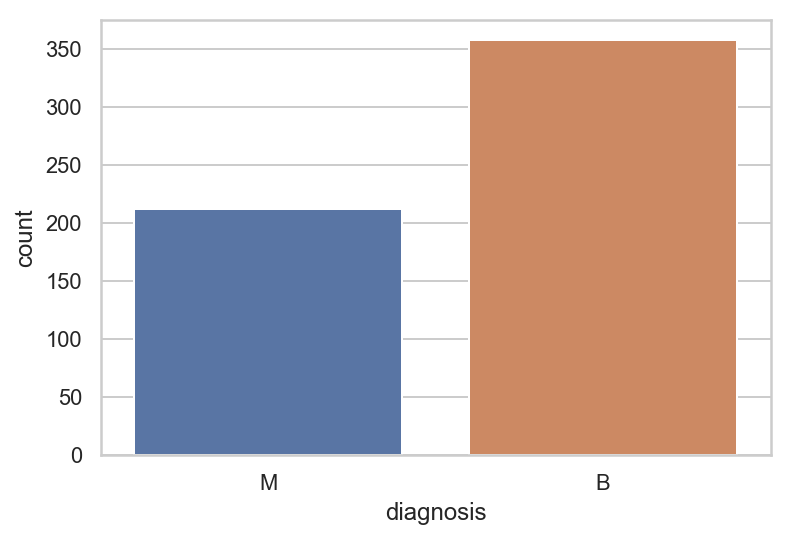

In [8]:
print('Diagnosis Category Counts\n', y.value_counts())
sn.countplot(y,label="Count") 

In [9]:
y[0:5]

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data_set, y, test_size = 0.25, random_state = 42)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
decision_tree = DecisionTreeClassifier().fit(X_train_scaled, y_train)
print('Train model accuracy: {:.4f}'.format(decision_tree.score(X_train_scaled, y_train)))
print('Test model accuracy: {:.4f}'.format(decision_tree.score(X_test_scaled, y_test)))

Train model accuracy: 1.0000
Test model accuracy: 0.9510


In [14]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(decision_tree, out_file = None, class_names = ["malignant", "bening"],
               feature_names = data_set.columns )

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"5,5!"')
pydot_graph.write_png('tree.png')

True

(-1, 30)

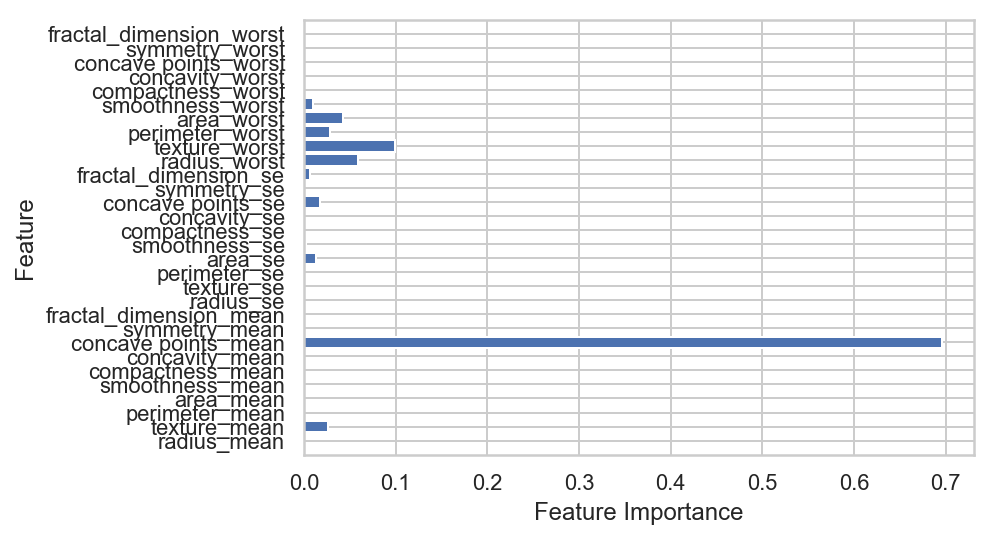

In [15]:
n_features = data_set.shape[1]
plt.barh(range(n_features), decision_tree.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), data_set.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.ylim(-1, n_features)

In [16]:
decision_tree = DecisionTreeClassifier(max_depth=4).fit(X_train_scaled, y_train)
print('Train model accuracy: {:.4f}'.format(decision_tree.score(X_train_scaled, y_train)))
print('Test model accuracy: {:.4f}'.format(decision_tree.score(X_test_scaled, y_test)))

Train model accuracy: 0.9953
Test model accuracy: 0.9510


In [17]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(decision_tree, out_file = None, class_names = ["malignant", "bening"],
               feature_names = data_set.columns )

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"5,5!"')
pydot_graph.write_png('tree_max_depth.png')

True

(-1, 30)

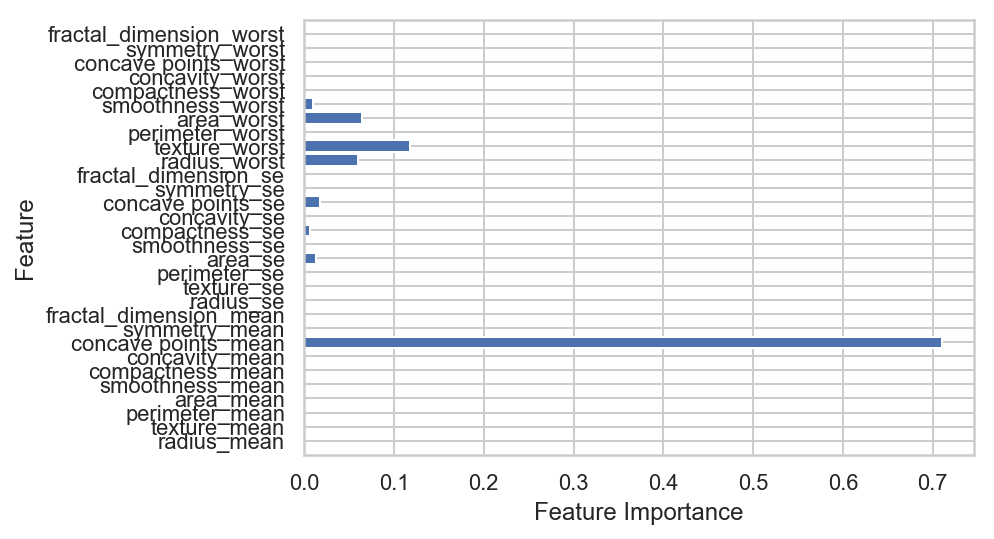

In [18]:
n_features = data_set.shape[1]
plt.barh(range(n_features), decision_tree.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), data_set.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.ylim(-1, n_features)

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
random_forest = RandomForestClassifier(random_state=42, n_estimators=5).fit(X_train_scaled, y_train)
print('Train model accuracy: {:.4f}'.format(random_forest.score(X_train_scaled, y_train)))
print('Test model accuracy: {:.4f}'.format(random_forest.score(X_test_scaled, y_test)))

Train model accuracy: 0.9906
Test model accuracy: 0.9580


(-1, 30)

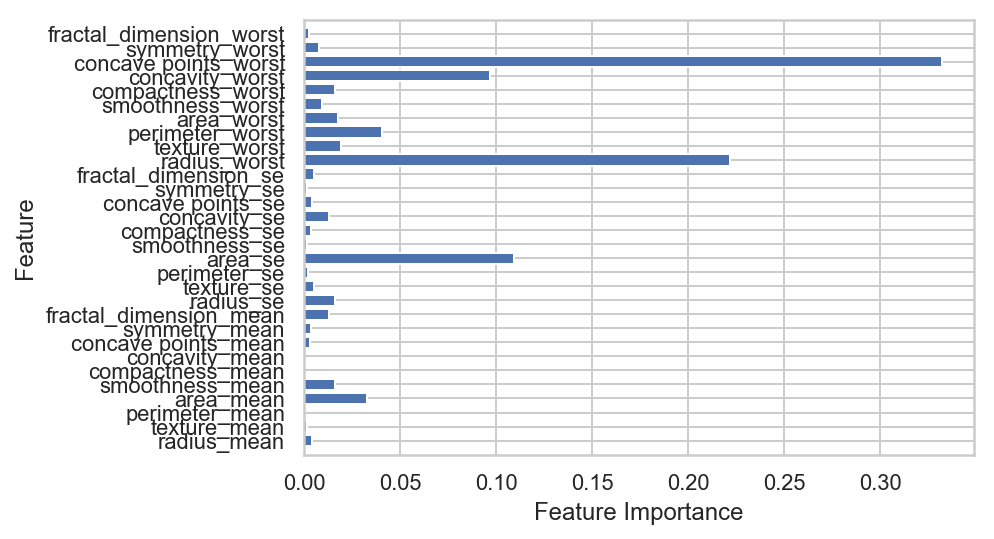

In [21]:
n_features = data_set.shape[1]
plt.barh(range(n_features), random_forest.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), data_set.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.ylim(-1, n_features)

In [22]:
random_forest = RandomForestClassifier(random_state=42, n_estimators=7).fit(X_train_scaled, y_train)
print('Train model accuracy: {:.4f}'.format(random_forest.score(X_train_scaled, y_train)))
print('Test model accuracy: {:.4f}'.format(random_forest.score(X_test_scaled, y_test)))

Train model accuracy: 0.9930
Test model accuracy: 0.9441


(-1, 30)

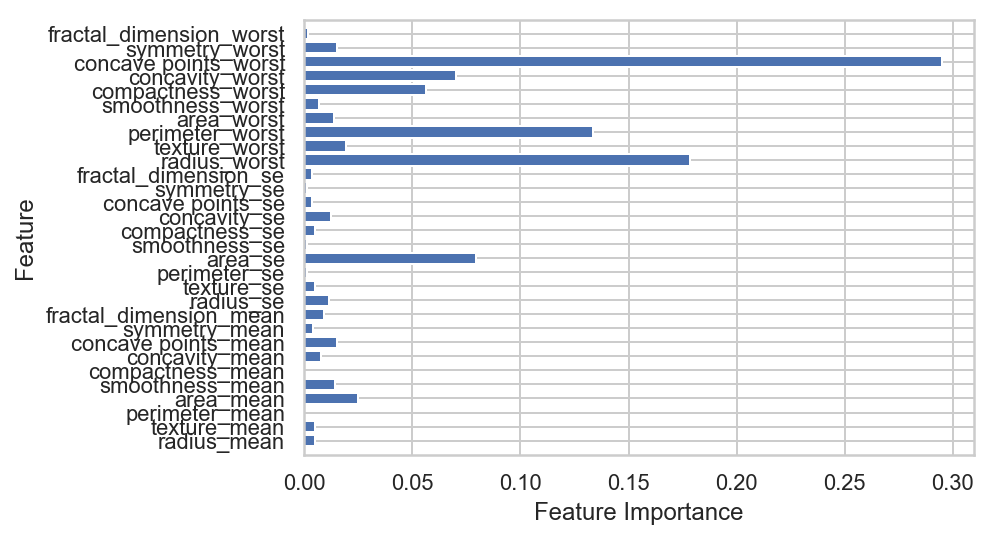

In [23]:
n_features = data_set.shape[1]
plt.barh(range(n_features), random_forest.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), data_set.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.ylim(-1, n_features)

In [24]:
random_forest = RandomForestClassifier(random_state=42, n_estimators=n_features).fit(X_train_scaled, y_train)
print('Train model accuracy: {:.4f}'.format(random_forest.score(X_train_scaled, y_train)))
print('Test model accuracy: {:.4f}'.format(random_forest.score(X_test_scaled, y_test)))

Train model accuracy: 1.0000
Test model accuracy: 0.9720


(-1, 30)

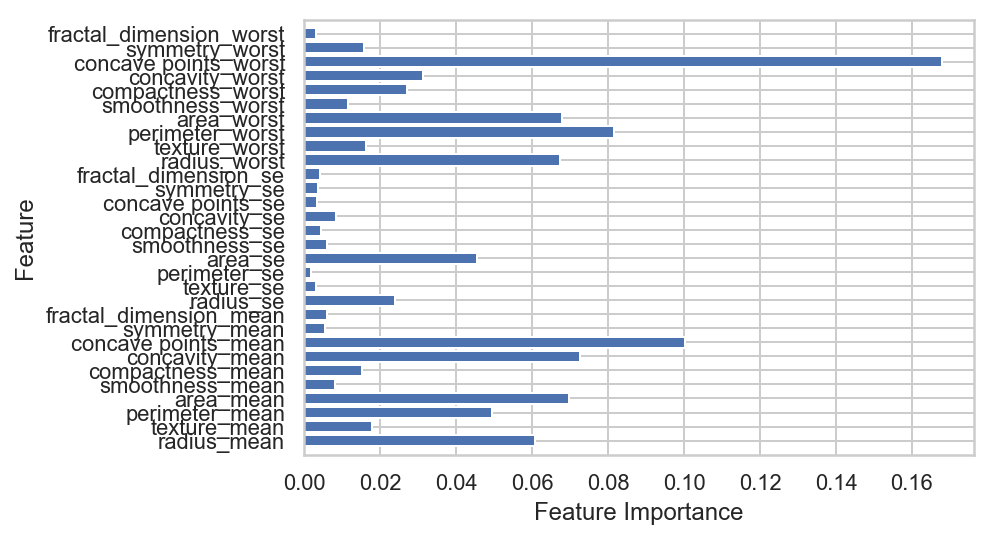

In [25]:
n_features = data_set.shape[1]
plt.barh(range(n_features), random_forest.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), data_set.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.ylim(-1, n_features)

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

In [27]:
gradient_boosting = GradientBoostingClassifier(random_state=42, learning_rate=0.1, n_estimators=100).fit(X_train_scaled, y_train)
print('Train model accuracy: {:.4f}'.format(gradient_boosting.score(X_train_scaled, y_train)))
print('Test model accuracy: {:.4f}'.format(gradient_boosting.score(X_test_scaled, y_test)))

Train model accuracy: 1.0000
Test model accuracy: 0.9580


(-1, 30)

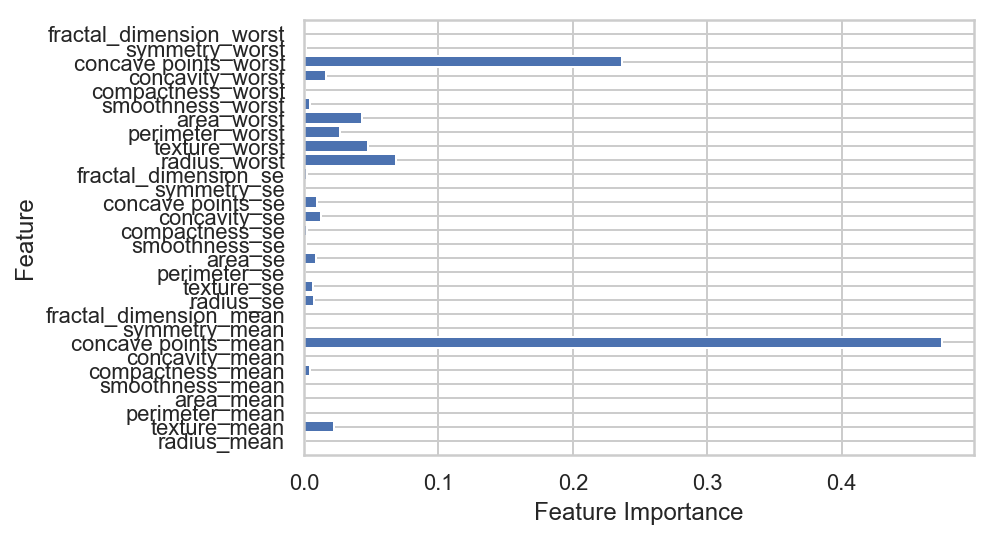

In [28]:
n_features = data_set.shape[1]
plt.barh(range(n_features), gradient_boosting.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), data_set.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.ylim(-1, n_features)

In [29]:
gradient_boosting = GradientBoostingClassifier(random_state=42, learning_rate=0.01, n_estimators=100).fit(X_train_scaled, y_train)
print('Train model accuracy: {:.4f}'.format(gradient_boosting.score(X_train_scaled, y_train)))
print('Test model accuracy: {:.4f}'.format(gradient_boosting.score(X_test_scaled, y_test)))

Train model accuracy: 0.9930
Test model accuracy: 0.9580


In [30]:
gradient_boosting = GradientBoostingClassifier(random_state=42, learning_rate=0.01, n_estimators=1000).fit(X_train_scaled, y_train)
print('Train model accuracy: {:.4f}'.format(gradient_boosting.score(X_train_scaled, y_train)))
print('Test model accuracy: {:.4f}'.format(gradient_boosting.score(X_test_scaled, y_test)))

Train model accuracy: 1.0000
Test model accuracy: 0.9580


In [31]:
gradient_boosting = GradientBoostingClassifier(random_state=42, learning_rate=0.01, n_estimators=50).fit(X_train_scaled, y_train)
print('Train model accuracy: {:.4f}'.format(gradient_boosting.score(X_train_scaled, y_train)))
print('Test model accuracy: {:.4f}'.format(gradient_boosting.score(X_test_scaled, y_test)))

Train model accuracy: 0.9836
Test model accuracy: 0.9650


In [32]:
gradient_boosting = GradientBoostingClassifier(random_state=42, learning_rate=0.001, n_estimators=100).fit(X_train_scaled, y_train)
print('Train model accuracy: {:.4f}'.format(gradient_boosting.score(X_train_scaled, y_train)))
print('Test model accuracy: {:.4f}'.format(gradient_boosting.score(X_test_scaled, y_test)))

Train model accuracy: 0.6291
Test model accuracy: 0.6224


In [33]:
gradient_boosting = GradientBoostingClassifier(random_state=42, learning_rate=0.001, n_estimators=1000).fit(X_train_scaled, y_train)
print('Train model accuracy: {:.4f}'.format(gradient_boosting.score(X_train_scaled, y_train)))
print('Test model accuracy: {:.4f}'.format(gradient_boosting.score(X_test_scaled, y_test)))

Train model accuracy: 0.9930
Test model accuracy: 0.9650


In [34]:
gradient_boosting.classes_

array(['B', 'M'], dtype=object)

In [35]:
gradient_boosting.predict_proba(X_test)[:10]

array([[0.48909764, 0.51090236],
       [0.48909764, 0.51090236],
       [0.48909764, 0.51090236],
       [0.48909764, 0.51090236],
       [0.48909764, 0.51090236],
       [0.24875821, 0.75124179],
       [0.24875821, 0.75124179],
       [0.48909764, 0.51090236],
       [0.48909764, 0.51090236],
       [0.48909764, 0.51090236]])

## __Feature Selection__

1- Model Based Feature Selection

In [36]:
from sklearn.feature_selection import SelectFromModel

In [37]:
select = SelectFromModel(RandomForestClassifier(random_state=42, n_estimators=100), threshold='median')

In [38]:
select.fit(X_train_scaled, y_train)
X_train_scaled_features = select.transform(X_train_scaled)

In [41]:
print('Original X shape:',X_train_scaled.shape)
print()
print('Eliminated X shape:',X_train_scaled_features.shape)

Original X shape: (426, 30)

Eliminated X shape: (426, 15)


In [50]:
feature_idx = select.get_support()
print(X_train.columns[feature_idx])

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'radius_se', 'area_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')


2- Recursive Feature Selection

In [51]:
from sklearn.feature_selection import RFE

In [52]:
select = RFE(RandomForestClassifier(random_state=42, n_estimators=100), n_features_to_select=10)
select.fit(X_train_scaled, y_train)
X_train_scaled_features_2 = select.transform(X_train_scaled)
feature_idx = select.get_support()
print(X_train.columns[feature_idx])

Index(['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')
